# 1. Environment Configuration
## 1.1 Modules load

In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import sklearn_pandas #collection of machine learning algorithms
print("scikit-learn pandas bridge version: {}". format(sklearn_pandas.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Python version: 3.7.3 (default, Dec 20 2019, 18:57:59) 
[GCC 8.3.0]
pandas version: 1.1.3
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.18.1
scikit-learn version: 0.23.2
scikit-learn pandas bridge version: 2.0.2


## 1.2 Components configuration (visualization)

In [2]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 1.3 Components configuration (ML and helpers)

In [3]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn_pandas import DataFrameMapper

## 1.4 Local and remote data sources definition

In [4]:
LOCAL_DATA='./data/'
REMOTE_BUCKET='gs://bbs-2019-aiml4b-base-mldata'

# 2 Data Inspection

## 2.1 Data access

In [5]:
import os
os.makedirs(LOCAL_DATA, exist_ok=True)
!gsutil cp -r $REMOTE_BUCKET/* $LOCAL_DATA

Copying gs://bbs-2019-aiml4b-base-mldata/gender_submission.csv...
Copying gs://bbs-2019-aiml4b-base-mldata/test.csv...
Copying gs://bbs-2019-aiml4b-base-mldata/train.csv...

Operation completed over 3 objects/90.9 KiB.                                     


## 2.2 Data load

In [6]:
raw_data = pd.read_csv(os.path.join(LOCAL_DATA,'train.csv'))

### 2.2.1 Data Attributes (structure)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### An explanation of attributes (features?)

##### PASSENGER ID
Some code for the passenger into Titanic's *information system*. It's like the Employee ID in your company!

##### TICKET
The ticket number / code

##### PCLASS
Ordinal variable
 - 1: upper class
 - 2: middle class
 - 3: lower class

##### NAME, SEX, AGE
It's the NAME, AGE and SEX of the passenger!

##### EMBARKED
The Port where the passenger was embarked

##### FARE
It's the fare paid by the passenger for the ticket

##### SIBSP
Represents number of related siblings/spouse aboard

##### PARCH
Represents number of related parents/children aboard

##### CABIN
Kind of approximate position on ship when the incident occurred

##### SURVIVED
It's the *label*

### 2.2.2 Data Preview (10 records)

In [8]:
raw_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q


### 2.2.3 Statistical Properties Overview

In [9]:
raw_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Thayer, Mr. John Borland Jr",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2.3 Features and target definition

In [10]:
RAW_FEATURES = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
IDS = ['PassengerId']
TARGET = ['Survived']
# dropped: Ticket, Cabin

In [11]:
df_features = raw_data[IDS + RAW_FEATURES]
df_labels = raw_data[IDS + TARGET]

In [12]:
df_features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
df_labels.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


# 3 Data Imputation

## 3.1 NULL values

In [14]:
print('Train columns with null values:\n', df_features.isnull().sum())

Train columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [15]:
mapper = DataFrameMapper([
    (['Age'], SimpleImputer(strategy='median')),
    (['Fare'], SimpleImputer(strategy='median')),
    (['Embarked'], SimpleImputer(strategy='most_frequent')),
], df_out=True, default=None)

In [16]:
df_features = mapper.fit_transform(df_features)

In [17]:
print('Train columns with null values:\n', df_features.isnull().sum())

Train columns with null values:
 Age            0
Fare           0
Embarked       0
PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
dtype: int64


# 4 Feature Engineering

In [18]:
df_features.sample(10)

,Age,Fare,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch
684,60.0,39.0000,S,685,2,"Brown, Mr. Thomas William Solomon",male,1,1
641,24.0,69.3000,C,642,1,"Sagesser, Mlle. Emma",female,0,0
780,13.0,7.2292,C,781,3,"Ayoub, Miss. Banoura",female,0,0
320,22.0,7.2500,S,321,3,"Dennis, Mr. Samuel",male,0,0
579,32.0,7.9250,S,580,3,"Jussila, Mr. Eiriik",male,0,0
204,18.0,8.0500,S,205,3,"Cohen, Mr. Gurshon ""Gus""",male,0,0
346,40.0,13.0000,S,347,2,"Smith, Miss. Marion Elsie",female,0,0
148,36.5,26.0000,S,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,0,2
155,51.0,61.3792,C,156,1,"Williams, Mr. Charles Duane",male,0,1
382,32.0,7.9250,S,383,3,"Tikkanen, Mr. Juho",male,0,0


## 4.1 FamilySize
Calculated field that comes from summing up the passenger itself, its siblings/spouse and its parents/children aboard with it

In [19]:
def eval_family_size(SibSp: pd.Series, Parch: pd.Series) -> pd.Series:
    """
    Evaluate the family size for each item
    """
    return (SibSp + Parch + 1).astype('int64') 

In [20]:
df_features['FamilySize'] = eval_family_size(df_features.SibSp, df_features.Parch)

In [21]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Fare         891 non-null    float64
 2   Embarked     891 non-null    object 
 3   PassengerId  891 non-null    object 
 4   Pclass       891 non-null    object 
 5   Name         891 non-null    object 
 6   Sex          891 non-null    object 
 7   SibSp        891 non-null    object 
 8   Parch        891 non-null    object 
 9   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 69.7+ KB


## 4.2 IsAlone
One more "calculation" to mark which passengers were travelling alone

In [22]:
df_features['IsAlone'] = df_features.apply(lambda x: 0 if x.FamilySize > 1 else 1, axis = 1)

## 4.3 Title

NAME variable is formattes as \<Surname\>, \<Title\>. \<Name\>.
Let's isolate the "Title" token.

In [23]:
def title_extractor(name: pd.Series) -> pd.Series:
    """
    Returns the title
    """
    return name.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [24]:
df_features['Title'] = title_extractor(df_features.Name)

In [25]:
df_features.head()

,Age,Fare,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
0,22.0,7.2500,S,1,3,"Braund, Mr. Owen Harris",male,1,0,2,0,Mr
1,38.0,71.2833,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,2,0,Mrs
2,26.0,7.9250,S,3,3,"Heikkinen, Miss. Laina",female,0,0,1,1,Miss
3,35.0,53.1000,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,2,0,Mrs
4,35.0,8.0500,S,5,3,"Allen, Mr. William Henry",male,0,0,1,1,Mr


### 4.3.1 Rare values

They call it the *Long Tail*

In [26]:
df_features['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Capt              1
Mme               1
Don               1
Lady              1
Jonkheer          1
Ms                1
Sir               1
the Countess      1
Name: Title, dtype: int64

In [27]:
serie = df_features['Title'].value_counts()
title_names = serie[serie >= 10 ].index.to_list()
print(title_names)

['Mr', 'Miss', 'Mrs', 'Master']


In [28]:
# Filter long tail on Title
df_features['Title'] = df_features['Title'].apply(lambda x: x if x in title_names else 'Misc')

Let's check our work

In [29]:
df_features['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

## 4.4 Feature Engineering Check

In [30]:
df_features.sample(10)

,Age,Fare,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
197,42.0,8.4042,S,198,3,"Olsen, Mr. Karl Siegwart Andreas",male,0,1,2,0,Mr
196,28.0,7.7500,Q,197,3,"Mernagh, Mr. Robert",male,0,0,1,1,Mr
603,44.0,8.0500,S,604,3,"Torber, Mr. Ernst William",male,0,0,1,1,Mr
70,32.0,10.5000,S,71,2,"Jenkin, Mr. Stephen Curnow",male,0,0,1,1,Mr
419,10.0,24.1500,S,420,3,"Van Impe, Miss. Catharina",female,0,2,3,0,Miss
811,39.0,24.1500,S,812,3,"Lester, Mr. James",male,0,0,1,1,Mr
132,47.0,14.5000,S,133,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,1,0,2,0,Mrs
639,28.0,16.1000,S,640,3,"Thorneycroft, Mr. Percival",male,1,0,2,0,Mr
401,26.0,8.0500,S,402,3,"Adams, Mr. John",male,0,0,1,1,Mr
216,27.0,7.9250,S,217,3,"Honkanen, Miss. Eliina",female,0,0,1,1,Miss


# 5 BINNING

Check and bin (transform a numerical feature to a categorical one) both AGE and FARE

## 5.1 FARE

<AxesSubplot:>

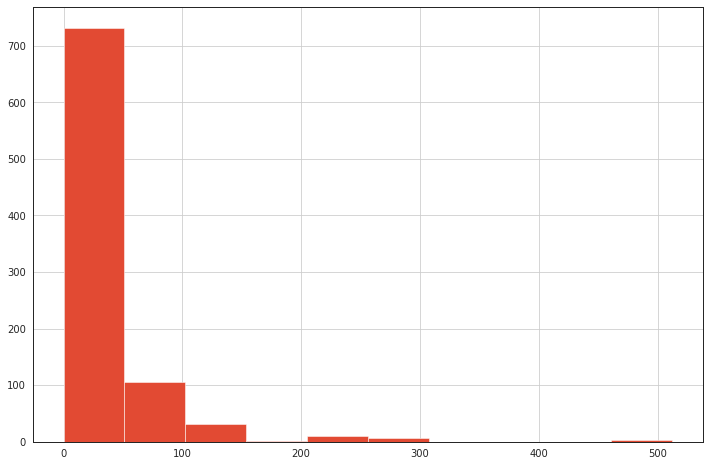

In [31]:
df_features['Fare'].hist()

## 5.2 AGE

<AxesSubplot:>

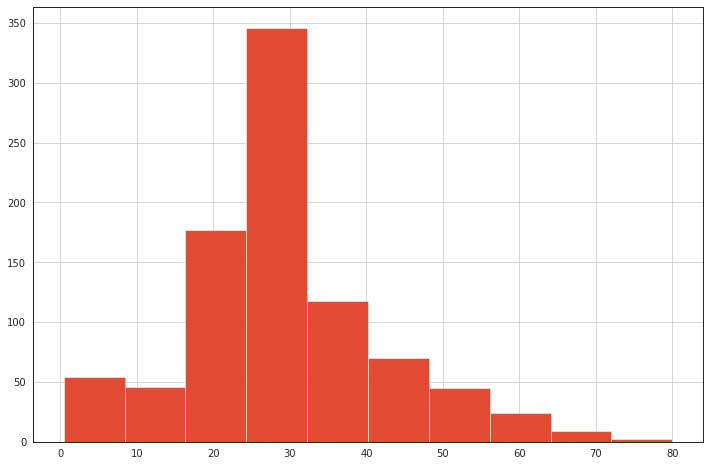

In [32]:
df_features['Age'].hist()

In [33]:
mapper_quantizer = DataFrameMapper([
    (['Age'], KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal'), {'suffix': '_Bin'}),
    (['Fare'], KBinsDiscretizer(n_bins=4, strategy='quantile', encode='ordinal'), {'suffix': '_Bin'}),
], df_out=True, default=None)

In [34]:
df_features = mapper_quantizer.fit_transform(df_features)

In [35]:
df_features.sample(20)

,Age_Bin,Fare_Bin,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
260,1.0,0.0,Q,261,3,"Smith, Mr. Thomas",male,0,0,1,1,Mr
472,2.0,2.0,S,473,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,1,2,4,0,Mrs
449,3.0,2.0,S,450,1,"Peuchen, Major. Arthur Godfrey",male,0,0,1,1,Misc
614,2.0,1.0,S,615,3,"Brocklebank, Mr. William Alfred",male,0,0,1,1,Mr
418,1.0,1.0,S,419,2,"Matthews, Mr. William John",male,0,0,1,1,Mr
517,1.0,2.0,Q,518,3,"Ryan, Mr. Patrick",male,0,0,1,1,Mr
821,1.0,1.0,S,822,3,"Lulic, Mr. Nikola",male,0,0,1,1,Mr
90,1.0,1.0,S,91,3,"Christmann, Mr. Emil",male,0,0,1,1,Mr
158,1.0,1.0,S,159,3,"Smiljanic, Mr. Mile",male,0,0,1,1,Mr
286,1.0,1.0,S,287,3,"de Mulder, Mr. Theodore",male,0,0,1,1,Mr


<AxesSubplot:>

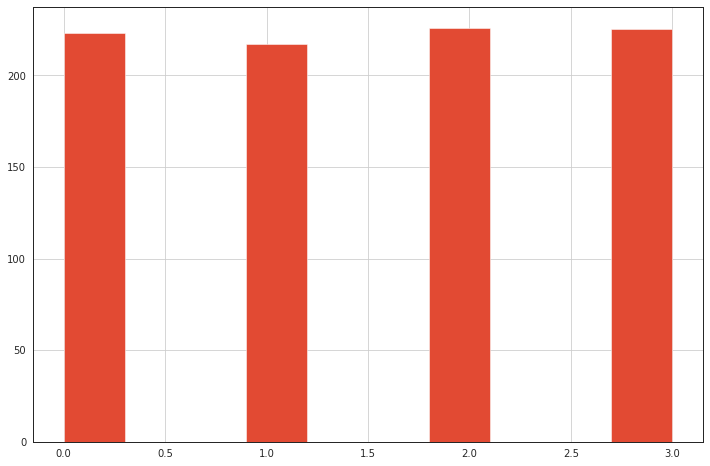

In [36]:
df_features.Fare_Bin.hist()

In [37]:
df_features[['Fare_Bin']].groupby(['Fare_Bin']).size()

Fare_Bin
0.0    223
1.0    217
2.0    226
3.0    225
dtype: int64

<AxesSubplot:>

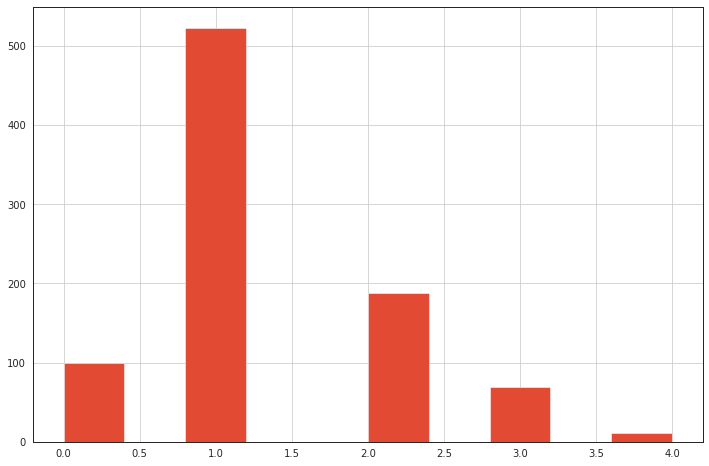

In [38]:
df_features.Age_Bin.hist()

In [39]:
df_features.sample(10)

,Age_Bin,Fare_Bin,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
181,1.0,2.0,C,182,2,"Pernot, Mr. Rene",male,0,0,1,1,Mr
581,2.0,3.0,C,582,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,1,1,3,0,Mrs
758,2.0,1.0,S,759,3,"Theobald, Mr. Thomas Leonard",male,0,0,1,1,Mr
814,1.0,1.0,S,815,3,"Tomlin, Mr. Ernest Portage",male,0,0,1,1,Mr
829,3.0,3.0,S,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,1,1,Mrs
71,0.0,3.0,S,72,3,"Goodwin, Miss. Lillian Amy",female,5,2,8,0,Miss
230,2.0,3.0,S,231,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,1,0,2,0,Mrs
508,1.0,2.0,S,509,3,"Olsen, Mr. Henry Margido",male,0,0,1,1,Mr
157,1.0,1.0,S,158,3,"Corn, Mr. Harry",male,0,0,1,1,Mr
852,0.0,2.0,C,853,3,"Boulos, Miss. Nourelain",female,1,1,3,0,Miss


In [40]:
df_features.drop(['Name'], axis=1, inplace=True)

In [41]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age_Bin      891 non-null    float64
 1   Fare_Bin     891 non-null    float64
 2   Embarked     891 non-null    object 
 3   PassengerId  891 non-null    object 
 4   Pclass       891 non-null    object 
 5   Sex          891 non-null    object 
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   FamilySize   891 non-null    object 
 9   IsAlone      891 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), object(9)
memory usage: 76.7+ KB


# Any chance of ML?

In [42]:
df = pd.merge(df_features, df_labels, how='inner', on='PassengerId')

In [43]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


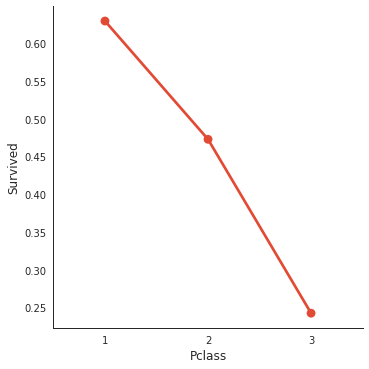

In [44]:
sns.catplot('Pclass','Survived', kind='point', data=df, ci=None);

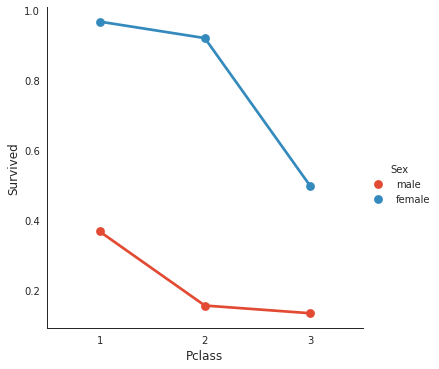

In [45]:
sns.catplot('Pclass','Survived', hue='Sex', kind='point', data=df, ci=None);

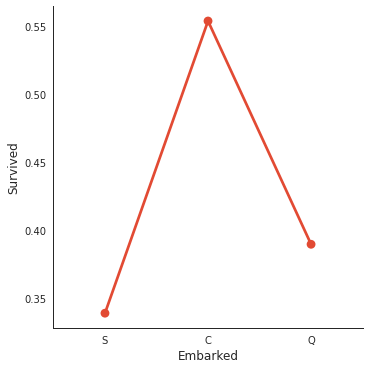

In [46]:
sns.catplot('Embarked','Survived', kind='point', data=df, ci=None);

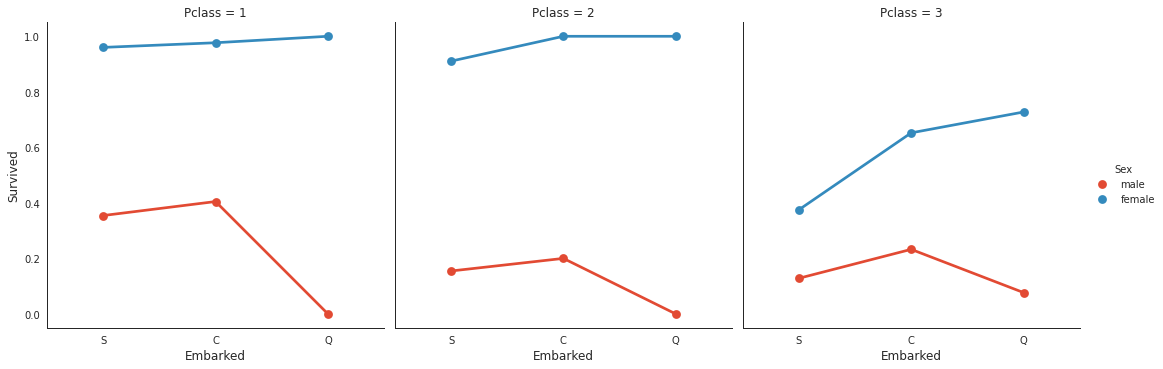

In [47]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df, ci=None);

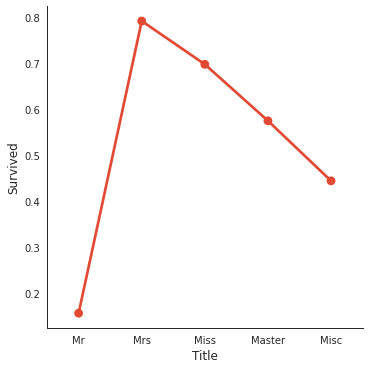

In [48]:
sns.catplot('Title','Survived', kind='point', data=df, ci=None);

In [49]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age_Bin      891 non-null    float64
 1   Fare_Bin     891 non-null    float64
 2   Embarked     891 non-null    object 
 3   PassengerId  891 non-null    object 
 4   Pclass       891 non-null    object 
 5   Sex          891 non-null    object 
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   FamilySize   891 non-null    object 
 9   IsAlone      891 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), object(9)
memory usage: 76.7+ KB


In [50]:
df_features.sample(10)

,Age_Bin,Fare_Bin,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,FamilySize,IsAlone,Title
172,0.0,1.0,S,173,3,female,1,1,3,0,Miss
254,2.0,2.0,S,255,3,female,0,2,3,0,Mrs
497,1.0,2.0,S,498,3,male,0,0,1,1,Mr
772,3.0,1.0,S,773,2,female,0,0,1,1,Mrs
144,1.0,1.0,S,145,2,male,0,0,1,1,Mr
613,1.0,0.0,Q,614,3,male,0,0,1,1,Mr
363,2.0,0.0,S,364,3,male,0,0,1,1,Mr
159,1.0,3.0,S,160,3,male,8,2,11,0,Master
507,1.0,2.0,S,508,1,male,0,0,1,1,Mr
137,2.0,3.0,S,138,1,male,1,0,2,0,Mr


# 7 Format Transformation: CATEGORICAL data to OneHot

OneHotEncoder is aimed to transform "list of alphanumeric values" into a vector of 0's and 1.

In [51]:
df_features = pd.get_dummies(df_features, columns=['Sex','Embarked','Title'], drop_first=True)

In [52]:
df_features.sample(10)

,Age_Bin,Fare_Bin,PassengerId,Pclass,SibSp,Parch,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
395,1.0,0.0,396,3,0,0,1,1,1,0,1,0,0,1,0
122,2.0,2.0,123,2,1,0,2,0,1,0,0,0,0,1,0
307,1.0,3.0,308,1,1,0,2,0,0,0,0,0,0,0,1
634,0.0,2.0,635,3,3,2,6,0,0,0,1,0,1,0,0
360,2.0,2.0,361,3,1,4,6,0,1,0,1,0,0,1,0
563,1.0,1.0,564,3,0,0,1,1,1,0,1,0,0,1,0
666,1.0,1.0,667,2,0,0,1,1,1,0,1,0,0,1,0
213,1.0,1.0,214,2,0,0,1,1,1,0,1,0,0,1,0
90,1.0,1.0,91,3,0,0,1,1,1,0,1,0,0,1,0
297,0.0,3.0,298,1,1,2,4,0,0,0,1,0,1,0,0


# 8 Machine Learning (at last!)

## 8.1 Train/test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_features[[ x for x in df_features.columns.tolist() if x != 'PassengerId']],
                                                    df_labels[[ x for x in df_labels.columns.tolist() if x != 'PassengerId']],
                                                    random_state = 0)

## 8.2 Support Vector Machines

In [54]:
param_grid = [{'kernel': ['rbf'], 'C': [10, 100, 1000], 'gamma' : [1e-2, 1e-3, 1e-4]},
              {'kernel': ['linear'], 'C': [1, 10, 100]}]

gcv = GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=4)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['linear']}])

In [55]:
mu = gcv.cv_results_['mean_test_score']
std = gcv.cv_results_['std_test_score']
pars = gcv.cv_results_['params']
for (m,s,p) in zip(mu,std,pars):
    print('%.2f (+-%.2f): %s' %(m,s,p))

0.82 (+-0.02): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.80 (+-0.02): {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.61 (+-0.00): {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.84 (+-0.02): {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.82 (+-0.03): {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.79 (+-0.02): {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.82 (+-0.02): {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.82 (+-0.03): {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.81 (+-0.03): {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.82 (+-0.03): {'C': 1, 'kernel': 'linear'}
0.83 (+-0.03): {'C': 10, 'kernel': 'linear'}
0.83 (+-0.03): {'C': 100, 'kernel': 'linear'}


In [56]:
print('hyperparams: %s' % gcv.best_params_)

hyperparams: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


## 8.3 Results on Test set

In [57]:
pred = gcv.predict(X_test)

### 8.3.1 Precision/Accuracy/Recall

In [58]:
print(classification_report(pred, y_test))
print('accuracy %.2f' % accuracy_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       142
           1       0.74      0.77      0.75        81

    accuracy                           0.82       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.82      0.82      0.82       223

accuracy 0.82


### 8.3.2 Confusion Matrix

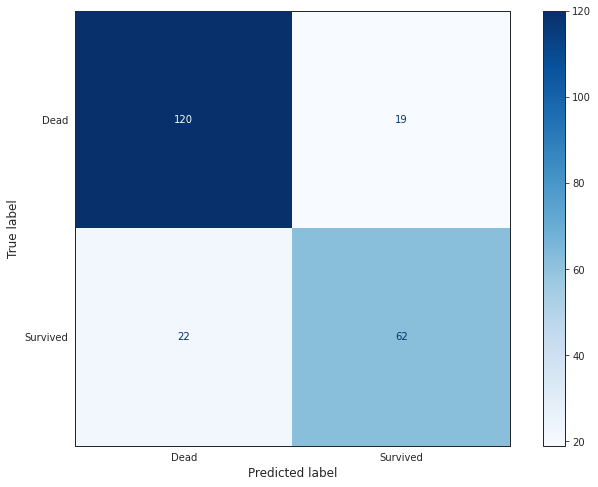

In [59]:
sklearn.metrics.plot_confusion_matrix(gcv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Dead', 'Survived'])

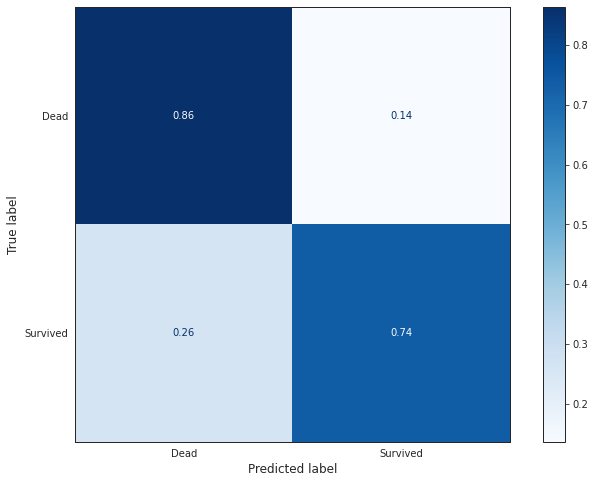

In [60]:
sklearn.metrics.plot_confusion_matrix(gcv, X_test, y_test, normalize='true', cmap=plt.cm.Blues, display_labels=['Dead', 'Survived'])